In [92]:
import pandas as pd
from typing import Any, Optional
import pandas as pd
import re
import os
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

from sklearn.model_selection import RandomizedSearchCV
import numpy as np


In [2]:
full_path = os.getcwd()

In [44]:
import warnings
warnings.filterwarnings("ignore")

## 1. Importing the Features dataset

In [75]:

customers = pd.read_csv(full_path.partition('notebooks')[0] + '/data/04_feature/customer_features.csv')


In [76]:
customers.tail()


,CustomerId,CreditType,CreditAmount,Duration_Months,NumberOfInstallmentsToPay,PaymentFrequency,HasDefault,run_date,Avg_Monthly_Income,Income_Stability,...,Previous_Loans_Std,Previous_Loan_Defaults,Active_Loans_Count,Active_Loan_Amount_Total,SegGroup,AMLRiskRating,YrNetMonthlyIn,Age,Is_Employed,Is_Married
9944,59548,Arranged Overdraft,16386.97,7.0,0,Single,0,20240531,65849.126667,26783.075231,...,0.0,0.0,0.0,0.00,Personal,Baixo,40967.43,39,1,0
9945,15865,Arranged Overdraft,6135.25,15.0,0,Single,0,20240531,16478.256667,2177.052809,...,0.0,0.0,1.0,91214.44,Personal,Baixo,12270.50,33,1,0
9946,374,Unarranged Overdraft,3.62,0.0,0,Single,0,20240531,13186.590000,0.000000,...,0.0,0.0,0.0,0.00,Personal,Baixo,12905.44,39,1,0
9947,41075,Personal Credit,474621.32,60.0,62,Monthly,1,20240531,10000.000000,0.000000,...,0.0,0.0,0.0,0.00,Personal,Baixo,48786.00,35,1,0
9948,39475,Unarranged Overdraft,8.16,0.0,0,Single,0,20240531,0.000000,0.000000,...,0.0,0.0,0.0,0.00,Personal,Baixo,18500.00,24,1,0


In [16]:
customers.columns

Index(['CustomerId', 'CreditType', 'CreditAmount', 'Duration_Months',
       'NumberOfInstallmentsToPay', 'PaymentFrequency', 'HasDefault',
       'run_date', 'Avg_Monthly_Income', 'Income_Stability',
       'Avg_Monthly_expenses', 'Expenses_Stability', 'Avg_Monthly_Funds',
       'Funds_Stability', 'Previous_Loan_Count', 'Previous_Loans_Avg_Amount',
       'Previous_Loans_Std', 'Previous_Loan_Defaults', 'Active_Loans_Count',
       'Active_Loan_Amount_Total', 'SegGroup', 'AMLRiskRating',
       'YrNetMonthlyIn', 'Age', 'Is_Employed', 'Is_Married'],
      dtype='object')

In [65]:
customers["HasDefault"].value_counts()

HasDefault
0    7434
1    2515
Name: count, dtype: int64

- Checking the target value

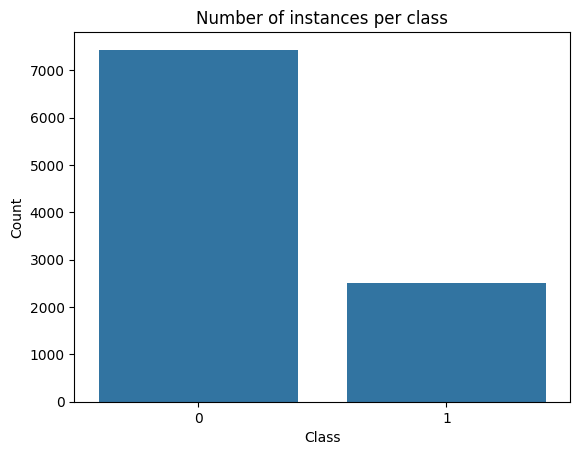

In [77]:
sns.countplot(data=customers,x="HasDefault")
plt.title("Number of instances per class")
plt.xlabel('Class')
plt.ylabel("Count")
plt.show()


- Defining X and y

In [78]:
X=customers.drop('HasDefault',axis=1)
y=customers['HasDefault']

In [79]:
X.head()

,CustomerId,CreditType,CreditAmount,Duration_Months,NumberOfInstallmentsToPay,PaymentFrequency,run_date,Avg_Monthly_Income,Income_Stability,Avg_Monthly_expenses,...,Previous_Loans_Std,Previous_Loan_Defaults,Active_Loans_Count,Active_Loan_Amount_Total,SegGroup,AMLRiskRating,YrNetMonthlyIn,Age,Is_Employed,Is_Married
0,61989,Credit Card,650000.0,36.0,0,Monthly,20230630,3.088140e+06,4.465342e+06,2.381424e+07,...,0.000000,0.0,0.0,0.0,Personal,Elevado,1000000.00,64,1,1
1,75075,Credit Card,130000.0,36.0,0,Monthly,20230630,8.468346e+05,1.606619e+06,2.438573e+05,...,17320.508076,0.0,0.0,0.0,Personal,Baixo,0.00,47,0,1
2,79216,Credit Card,100000.0,36.0,0,Monthly,20230630,2.953333e+05,1.955130e+05,2.507907e+05,...,0.000000,0.0,0.0,0.0,Personal,Baixo,224227.75,70,1,1
3,96717,Credit Card,750000.0,36.0,0,Monthly,20230630,9.513645e+05,6.054409e+05,1.157047e+06,...,0.000000,0.0,0.0,0.0,Personal,Baixo,6000000.00,46,1,1
4,96717,Credit Card,750000.0,36.0,0,Monthly,20230630,9.513645e+05,6.054409e+05,1.157047e+06,...,0.000000,0.0,0.0,0.0,Personal,Baixo,6000000.00,46,1,1


In [80]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: HasDefault, dtype: int64

## 2. Splitting the data

In [81]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

## 3. Transforming variables


In [82]:
categorical_cols=X.select_dtypes(include='object').columns.tolist()
categorical_cols

['CreditType', 'PaymentFrequency', 'SegGroup', 'AMLRiskRating']

- NumberOfInstallmentsToPay

In [83]:
X["NumberOfInstallmentsToPay"].value_counts()

NumberOfInstallmentsToPay
0      9084
61      353
62      213
1        49
63       48
37       38
25       36
13       17
49       13
50       11
38       10
2        10
19        8
26        6
31        5
51        5
39        5
14        3
12        3
86        3
27        3
9         2
7         2
60        2
18        2
43        1
66        1
20        1
245       1
11        1
21        1
98        1
6         1
326       1
56        1
45        1
32        1
28        1
4         1
17        1
183       1
42        1
29        1
Name: count, dtype: int64

- Categorical columns

In [84]:
categorical_cols=X.select_dtypes(include='object').columns.tolist()
categorical_cols

['CreditType', 'PaymentFrequency', 'SegGroup', 'AMLRiskRating']

- Numerical columns

In [85]:
numerical_cols=X.select_dtypes(include=[int,float]).columns.tolist()

In [87]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat',OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)


preprocessor.fit(X_train)
models={
    'LogisticRegression': LogisticRegression(),
    'Random Forest' : RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metrics='logloss', scale_pos_weight=3.09),
    'Gradient Boosting' : GradientBoostingClassifier()
}

for name, model in models.items():
    pipeline=Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('classifier',model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred=pipeline.predict(X_test)
    print(f"\n{name}")
    print(f"Accuracy: {accuracy_score(y_test,y_pred):.3f}")
    print(f"Precision: {precision_score(y_test,y_pred):.3f}")
    print(f"Recall: {recall_score(y_test,y_pred):.3f}")
    print(f"F1 Score: {f1_score(y_test,y_pred):.3f}")
    print(classification_report(y_test,y_pred))




LogisticRegression
Accuracy: 0.756
Precision: 0.514
Recall: 0.037
F1 Score: 0.069
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1503
           1       0.51      0.04      0.07       487

    accuracy                           0.76      1990
   macro avg       0.64      0.51      0.46      1990
weighted avg       0.70      0.76      0.67      1990


Random Forest
Accuracy: 0.814
Precision: 0.682
Recall: 0.446
F1 Score: 0.539
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1503
           1       0.68      0.45      0.54       487

    accuracy                           0.81      1990
   macro avg       0.76      0.69      0.71      1990
weighted avg       0.80      0.81      0.80      1990


SVM
Accuracy: 0.757
Precision: 0.543
Recall: 0.039
F1 Score: 0.073
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1503
        

- Hyperparameter tunning

In [93]:

#  Class imbalance ratio 
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos

In [95]:
# --- XGBoost classifier ---
xgb_clf = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

# --- Hyperparameter grid ---
param_dist = {
    'classifier__n_estimators': [200, 300,500,1000],
    'classifier__max_depth': [3, 5, 7, 9],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0]
}

# --- Pipeline ---
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', xgb_clf)
])

# --- Randomized Search CV ---
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# --- Fit search ---
random_search.fit(X_train, y_train)

# --- Best model ---
best_model = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

# --- Evaluate on test set ---
y_pred = best_model.predict(X_test)
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'classifier__subsample': 0.8, 'classifier__n_estimators': 500, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.05, 'classifier__colsample_bytree': 0.8}

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1503
           1       0.49      0.81      0.61       487

    accuracy                           0.75      1990
   macro avg       0.70      0.77      0.71      1990
weighted avg       0.82      0.75      0.76      1990

